# Car Price EDA - Visualization

### Table of Content

---

 - [Preparation](#preparation)
 - [Exploratory Analysis](#analysis)
  - [Numerical Features](#num) 
      - Distplot, Heatmap, Regplot, Jointplot-[Summary1](#smr-num)
  - [Categorical Features](#cat) 
      - Boxplot, Swarmplot, Violinplot, Pointplot-[Summary2](#smr-cat)
  - [Multi-Variables](#multi) 
      - Lmplot, Pairplot
 - [Pearson Score & P-Values](#p-values)  
      - [Summary3](#smr-pvalue)
 - [Conclusion: Important Variables](#conclusion) 
 
### Libraries

- `pandas`, `numpy`, `matplotlib`, `seaborn(comprehensive)`    

---

__Author: Yue Wu__

# 1 - Preparation <a id='preparation'></a>

### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data='./auto85/auto_clean.csv'
df = pd.read_csv(data)
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1


### Subset Numerical & Categorical Features

In [3]:
df_cat = df.select_dtypes(include='object')
df_cat = pd.concat([df_cat,df['price']],axis=1)

In [4]:
df_cat.shape

(201, 11)

In [5]:
df_num = df.select_dtypes(include = 'number')

In [6]:
df_num.shape

(201, 19)

 
 
# 2 - Exploratory Data Analysis <a id='analysis'></a>

## Numerical Features<a id="num"></a>

- distplot
- heatmap
- feature selection
- heatmap 
- regplot 

### Distribution 
- distplot

In [7]:
plt.style.use('ggplot')
sns.set_context('talk')

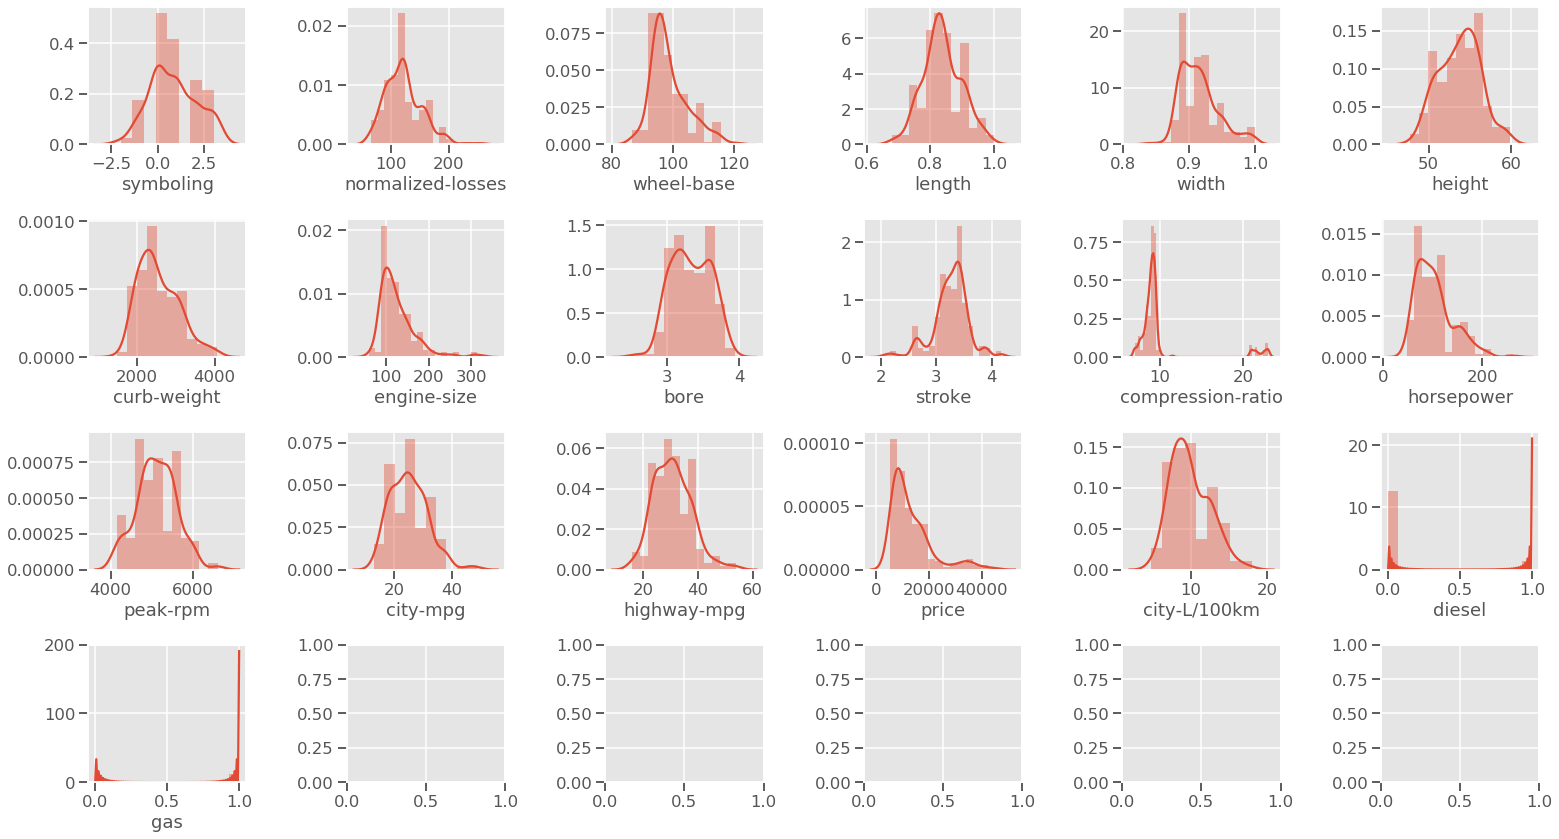

In [8]:
ncols=6
length = df_num.shape[1]
nrows=length//ncols if length%ncols==0 else length//ncols+1

fig, ax = plt.subplots(nrows=nrows, ncols = ncols, figsize = (22, 12))

for idx, col in enumerate(df_num): 
    i = idx//ncols
    j = idx%ncols
    sns.distplot(df_num[col], ax = ax[i][j])

plt.tight_layout()

### Heatmap

(19.0, 0.0)

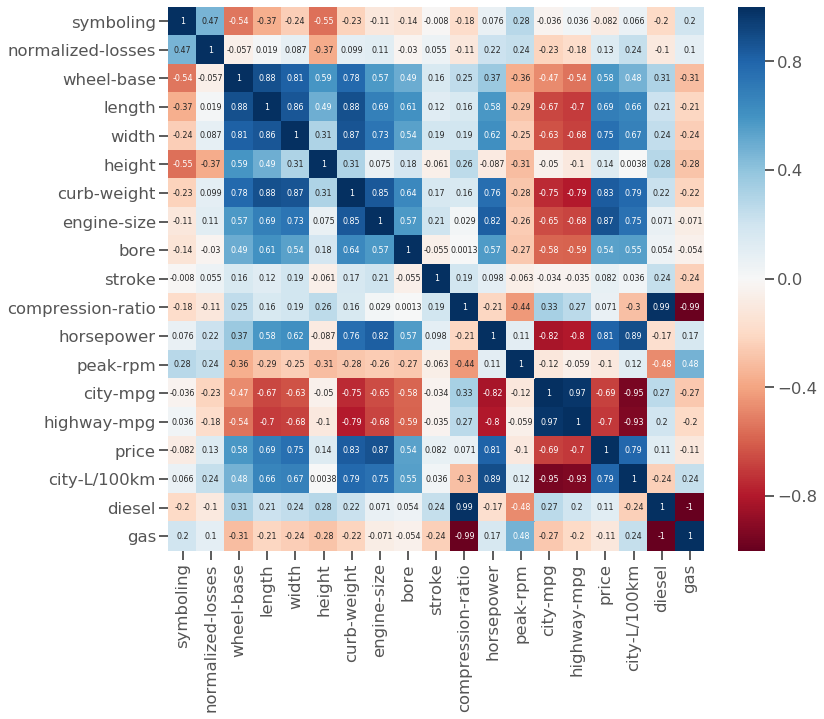

In [9]:
corrmap = df_num.corr()

fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corrmap, annot = True, annot_kws = {'size': 8}, cmap='RdBu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### Correlated Feature Selection

In [10]:
def getCorrelatedFeature(corrdata, threshold): 
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):  
        if abs(corrdata[index]) > threshold:  
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index=feature, columns=['corr value'])
    
    return df

### Price-Related Features with Correlation Score > 0.5 

In [11]:
threshold = 0.5
corr_features = getCorrelatedFeature(corrmap['price'],threshold)

print(len(corr_features))
corr_features

11


,corr value
wheel-base,0.584642
length,0.690628
width,0.751265
curb-weight,0.834415
engine-size,0.872335
bore,0.543155
horsepower,0.809575
city-mpg,-0.686571
highway-mpg,-0.704692
price,1.000000


### Heatmap with Correlated Features

(11.0, 0.0)

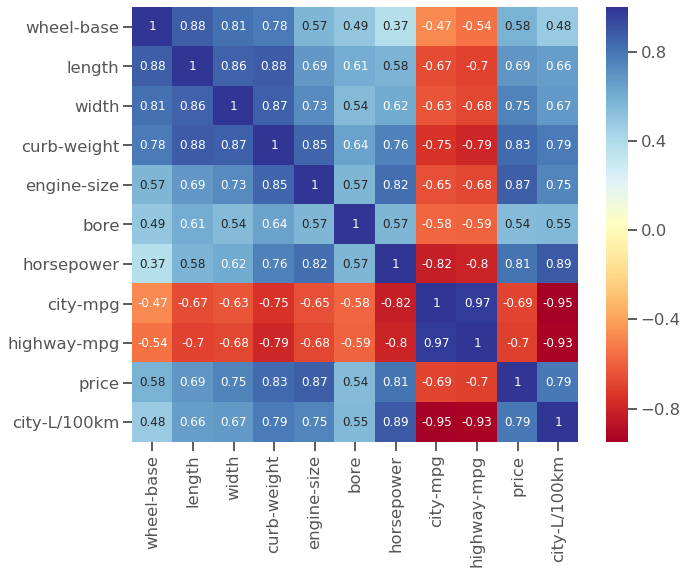

In [12]:
corr_df = df_num[corr_features.index]

fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(corr_df.corr(), annot = True, annot_kws = {'size': 12},cmap='RdYlBu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### Regression Plot with Correlated Features

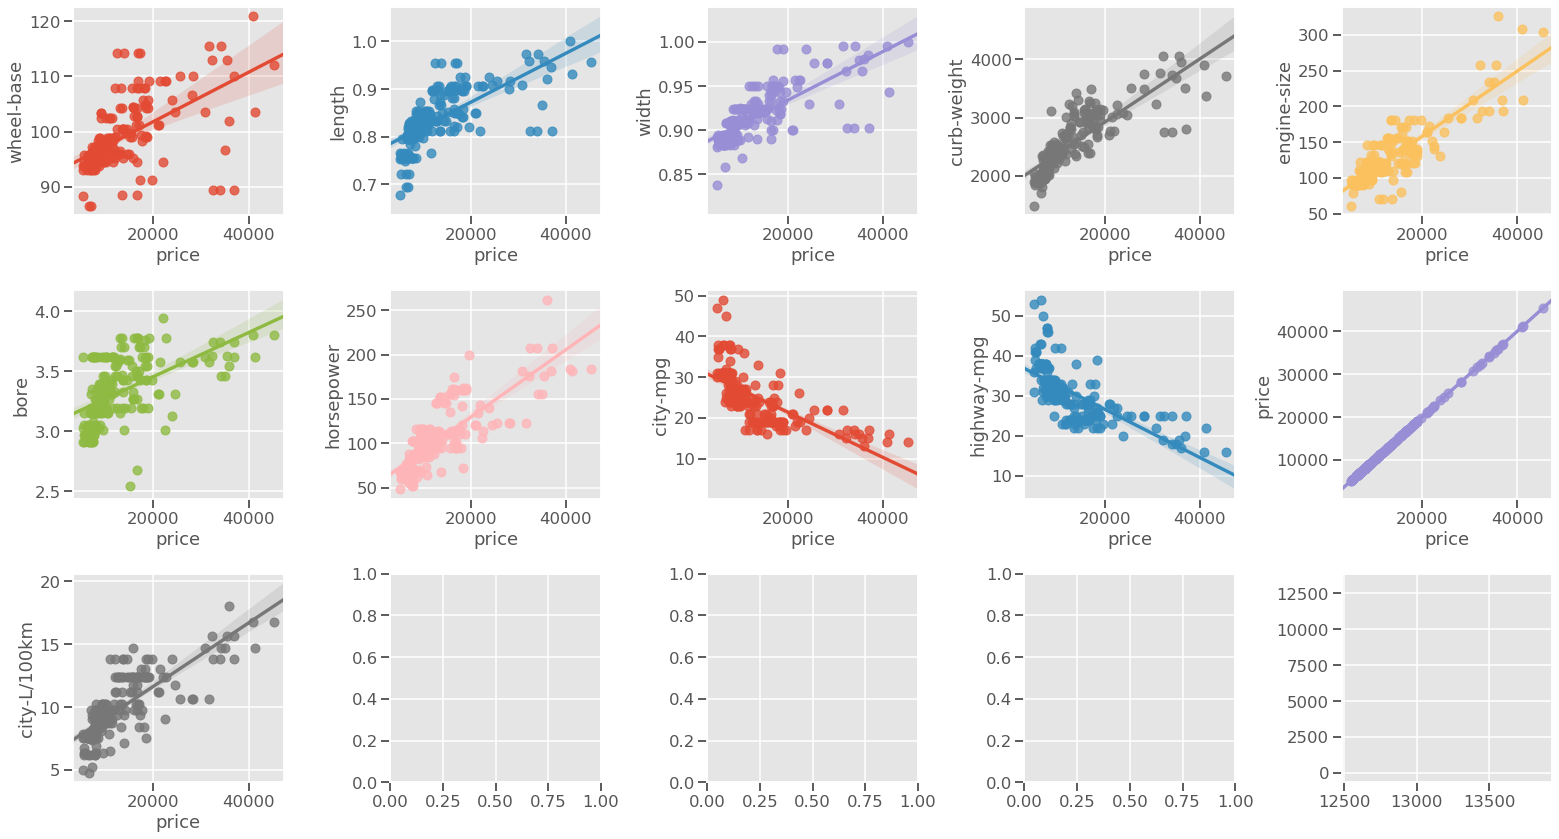

In [13]:
ncols=5
length = corr_df.shape[1]
nrows=length//ncols if length%ncols==0 else length//ncols+1

fig, ax = plt.subplots(nrows=nrows, ncols = ncols, figsize = (22, 12))

for idx, col in enumerate(corr_df):  
    i=idx//ncols
    j=idx%ncols
    sns.regplot(x = 'price', y = col, data = corr_df, ax = ax[i][j])

plt.tight_layout()

As shown above, selected features are clearly correlated with Price.

### Jointplot 

Closely look at how high-corr score features relate to price with `kde` and `hex`

#### 1-Curb-weight & Price

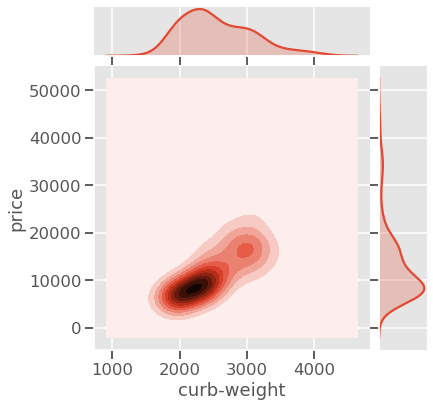

In [14]:
sns.jointplot(x='curb-weight',y='price',data=corr_df,kind='kde') 

Note: Curb-weight spreads mainly across 2000-3000, while price in range 0-20000.

#### 2-Engine-size & Price

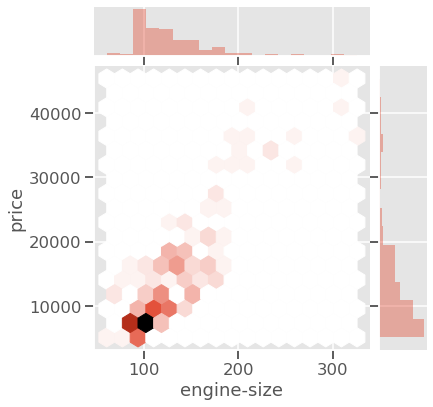

In [15]:
sns.jointplot(x='engine-size',y='price',data=corr_df,kind='hex') 

Note: Data mainly gather around lower engine-size and lower price part.

### Summary1 - Numerical Predictors <a id="smr-num"></a> 

- positive correlation  
 - wheel-base
 - length
 - width
 - curb-weight
 - engine-size
 - bore
 - horsepower
 
 
- negative correlation
 - city-mpg
 - high-mpg
 

---

## Categorical Features  <a id='cat'></a>
 
- boxplot
- violinplot
- swarm
- pointplot


In [16]:
df_cat.head(2)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,price
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,13495.0
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,16500.0


### Distribution - Boxplot
See how data spreads.

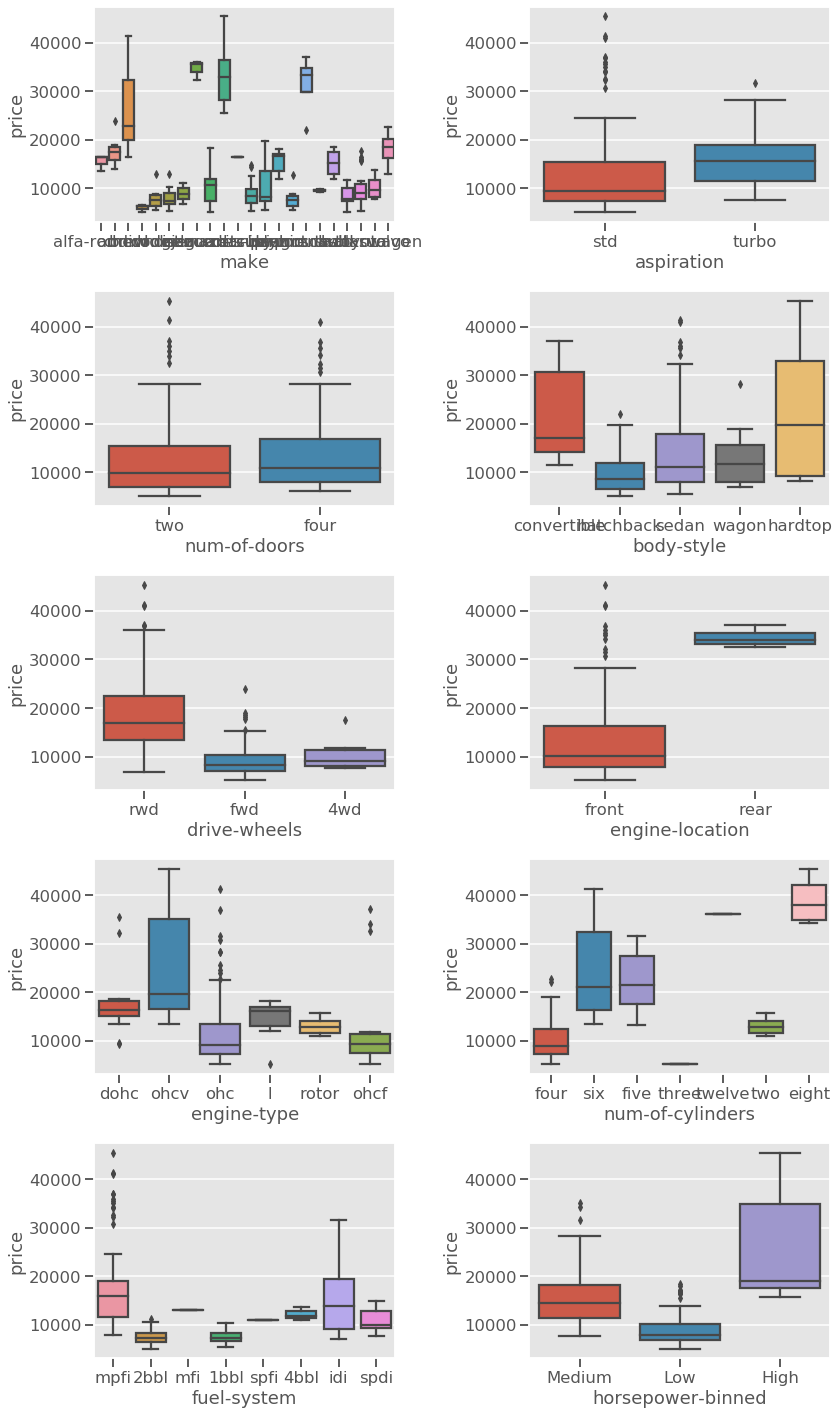

In [17]:
rows = 5
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (12, 20))

col = df_cat.columns
index = 0

for i in range(rows):
    for j in range(cols):
        if col[index]!='price':
            index = index
        else:
            index = index +1
        sns.boxplot(x= df_cat[col[index]], y='price', data = df_cat, ax = ax[i][j])
        index +=1

plt.tight_layout()

### Swarmplot

See how data is gathered.

In [18]:
df_cat6 = df_cat.drop(columns = ['make','num-of-doors','body-style','fuel-system'])

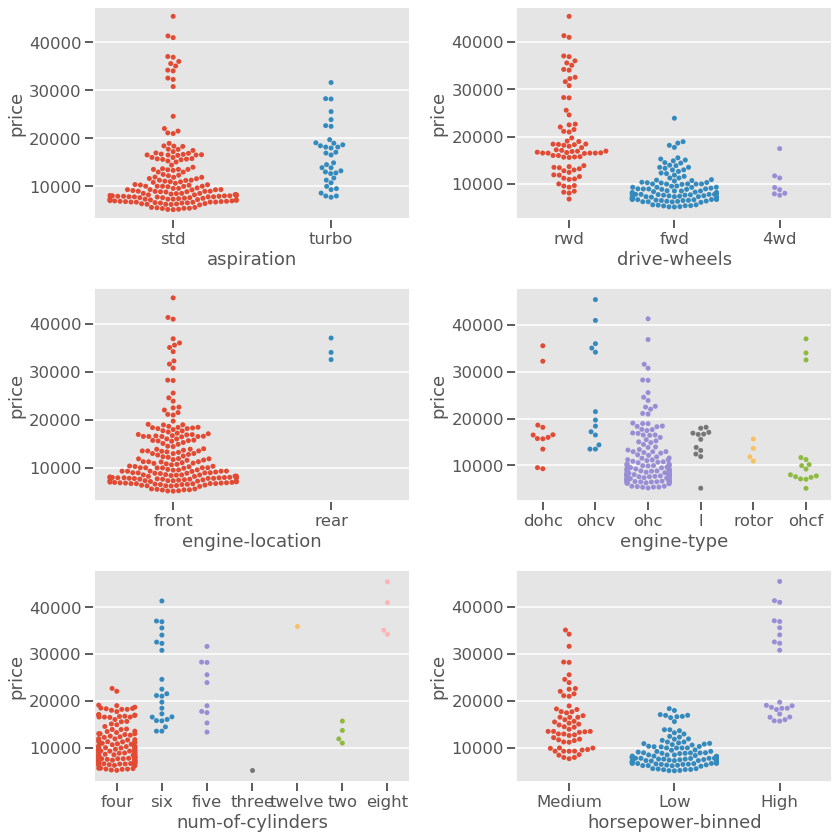

In [19]:
rows = 3
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (12, 12))

col = df_cat6.columns
index = 0

for i in range(rows):
    for j in range(cols):
        if col[index]!='price':
            index = index
        else:
            index = index +1
        sns.swarmplot(x= df_cat6[col[index]], y='price', data = df_cat6, ax = ax[i][j])
        index +=1

plt.tight_layout()

### Violinplot
Double check distribution

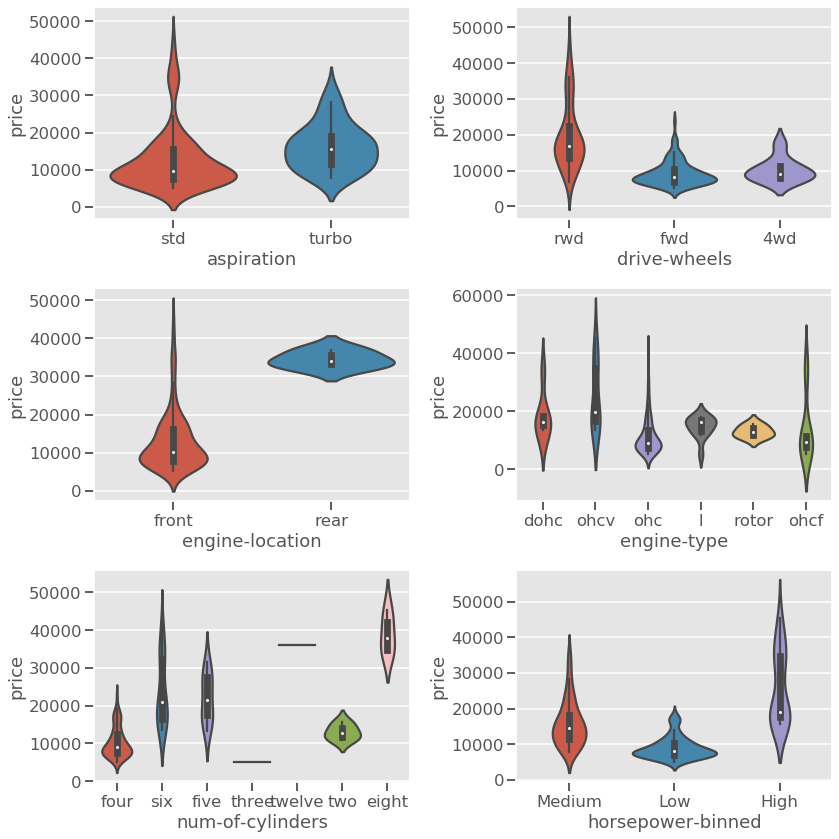

In [20]:
rows = 3
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (12, 12))

col = df_cat6.columns
index = 0

for i in range(rows):
    for j in range(cols):
        if col[index]!='price':
            index = index
        else:
            index = index +1
        sns.violinplot(x= df_cat6[col[index]], y='price', data = df_cat6, ax = ax[i][j])
        index +=1

plt.tight_layout()

### Pointplot
Further examine price correlation within selected groups

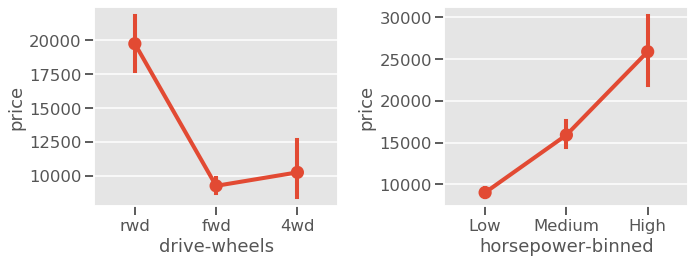

In [21]:
fig=plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.pointplot(x='drive-wheels',y='price',data=df_cat6)

plt.subplot(1,2,2)
sns.pointplot(x='horsepower-binned',y='price',order = ['Low','Medium','High'],data=df_cat6)

plt.tight_layout()

Prices vary largely within __drive-wheels__ and __horsepower-binned__ groups

### Heatmap

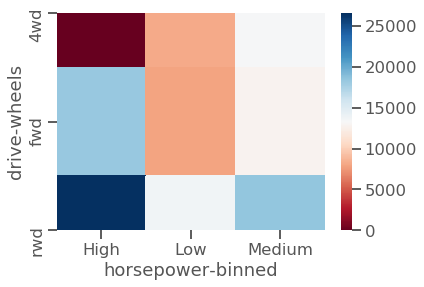

In [22]:
corr_df_c=df[['drive-wheels','horsepower-binned','price']]

grouped=corr_df_c.pivot_table(index='drive-wheels',
                              columns='horsepower-binned',
                              values='price',
                              aggfunc='mean',
                              fill_value=0)

sns.heatmap(grouped, cmap='RdBu')


### Summary2 - Categorical Predictors <a id="smr-cat"></a>
#### Boxplot

- Bad predictors - distribution overlap(OV) or no pattern(NP)
 - make (OV)
 - num-of-doors (NP)
 - body-style (NP)
 - fuel-system (NP)

#### Swarmplot

- Bad predictors with uneven category sizes that will skew prediction
 - aspiration
 - engine-location
 - engine-type
 - num-of-cylinders


#### Potential Good Predictors
 - drive-wheels
 - horsepower-binned


---

## Multi Variables <a id="multi"><a>

- Lmplot
- Pairplot

### Lmplot

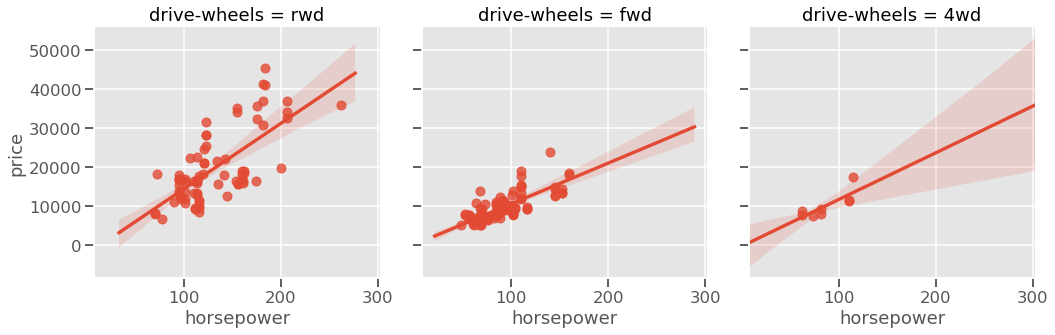

In [23]:
sns.lmplot(x='horsepower',y='price',col = 'drive-wheels',data=df) 

###  Pairplot <a id="pairplot"></a>

Group Correlation for Price-Correlated Features

Feature 1 to 5.

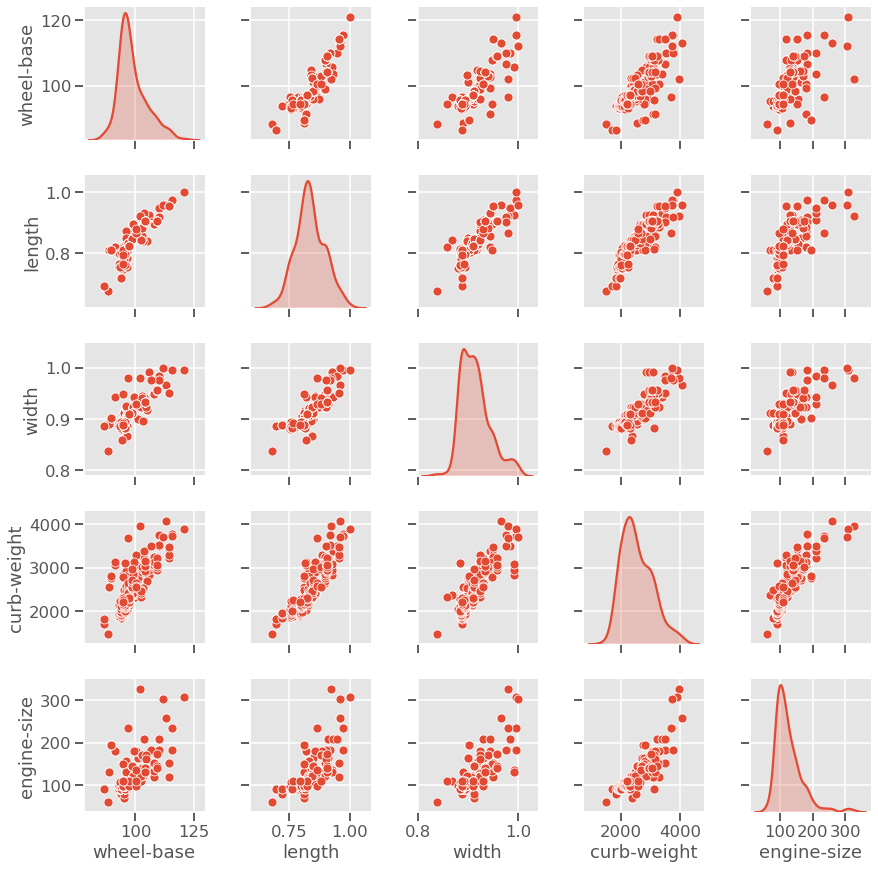

In [24]:
sns.pairplot(corr_df.iloc[:, np.hstack(([0], range(1, 5)))], diag_kind='kde')

Feature 6 to 10.

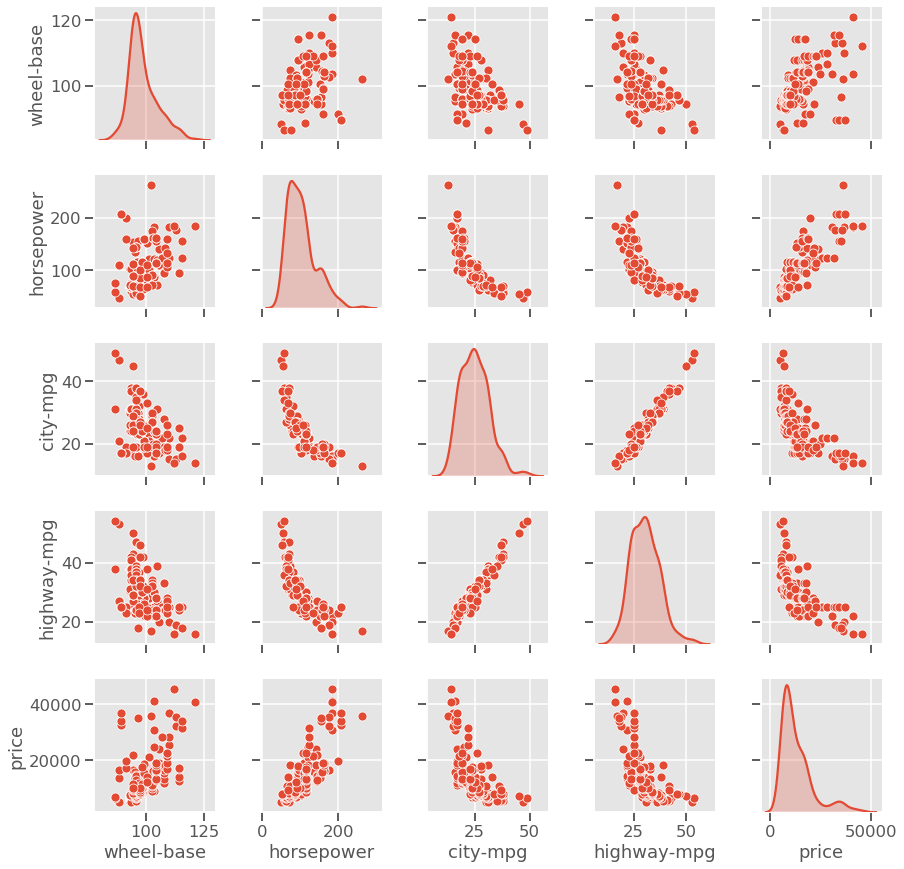

In [25]:
sns.pairplot(corr_df.iloc[:, np.hstack(([0], range(6, 10)))], diag_kind='kde')

Most pair groups are also somewhat correlated.

---

## 3 - Pearson Score & P-values <a id='p-values'></a>

### Calculate P-values

In [26]:
from scipy import stats

test=corr_df[corr_df.columns.difference(['price'])]

p_value=[]
pearson_coef=[]
feature=[]

for idx, col in test.iteritems():
    pef, pv = stats.pearsonr(col, df['price'])
    
    p_value.append(pv)
    pearson_coef.append(pef)
    feature.append(idx)
    
prscoef=pd.DataFrame(zip(feature,pearson_coef,p_value), 
                    columns=['name','pearson_coef','p_value'])
prscoef
   

,name,pearson_coef,p_value
0,bore,0.543155,8.049189e-17
1,city-L/100km,0.789898,3.903106e-44
2,city-mpg,-0.686571,2.321132e-29
3,curb-weight,0.834415,2.189577e-53
4,engine-size,0.872335,9.265492e-64
5,highway-mpg,-0.704692,1.749547e-31
6,horsepower,0.809575,6.369057e-48
7,length,0.690628,8.016477e-30
8,wheel-base,0.584642,8.076488e-20
9,width,0.751265,9.200336e-38


### Summary3 - P-values <a id="smr-pvalue"></a>

Since the p-value is $<$ 0.001, the correlations between initially filtered corr-features and price are __statistically significant__, and the linear relationship is __very strong (abs(coef)>0.5)__

---

## 4 - Conclusion: Important Variables  <a id='conclusion'></a>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
    <li>Horsepower-binned</li>
</ul>


# The End : )